# Logistic Regression as a Neural Network 

(partly following deeplearning.ai lab)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd 
from math import isnan
%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## Parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [50]:
# sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    return s

### Initializing parameters

In [23]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [24]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [7]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [25]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. 

In [179]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction


Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [178]:
# model

def model_gd(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train accuracy" : 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100,
        'test accuracy': 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100}
    
    return d

## Import data and train model

In [33]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [34]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [35]:
target = bioresponce.Activity.values
bioresponce.drop(['Activity'], axis=1, inplace=True)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(bioresponce, target,  test_size=0.35, random_state=1)
x_train = x_train.to_numpy().T
x_test = x_test.to_numpy().T

In [62]:
output_gd = model_gd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.680172
Cost after iteration 200: 0.672863
Cost after iteration 300: 0.666332
Cost after iteration 400: 0.660251
Cost after iteration 500: 0.654557
Cost after iteration 600: 0.649208
Cost after iteration 700: 0.644168
Cost after iteration 800: 0.639409
Cost after iteration 900: 0.634904
Cost after iteration 1000: 0.630632
Cost after iteration 1100: 0.626573
Cost after iteration 1200: 0.622709
Cost after iteration 1300: 0.619025
Cost after iteration 1400: 0.615507
Cost after iteration 1500: 0.612143
Cost after iteration 1600: 0.608921
Cost after iteration 1700: 0.605831
Cost after iteration 1800: 0.602863
Cost after iteration 1900: 0.600011
train accuracy: 73.0926989335521 %
test accuracy: 70.98248286367098 %


# Logistic Regression as a Neural Network  with SGD

In [55]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        
        # choose random set of axes
        
        a = randrange(5,X.shape[1]-10)

        X1 = np.array(X[:,a:a+32])
        Y1 = np.array(Y[a:a+32])
      
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X1,Y1)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [168]:
# model2 (sgd)

def model_sgd(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
  
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train accuracy" : 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100,
         'test accuracy': 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100}
        
    
    return d

In [63]:
output_gsd = model_sgd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.655784
Cost after iteration 200: 0.687726
Cost after iteration 300: 0.664557
Cost after iteration 400: 0.630024
Cost after iteration 500: 0.671199
Cost after iteration 600: 0.643518
Cost after iteration 700: 0.668811
Cost after iteration 800: 0.620716
Cost after iteration 900: 0.650236
Cost after iteration 1000: 0.636980
Cost after iteration 1100: 0.711660
Cost after iteration 1200: 0.608032
Cost after iteration 1300: 0.652812
Cost after iteration 1400: 0.611472
Cost after iteration 1500: 0.615437
Cost after iteration 1600: 0.592555
Cost after iteration 1700: 0.619139
Cost after iteration 1800: 0.617792
Cost after iteration 1900: 0.618044
train accuracy: 73.01066447908121 %
test accuracy: 70.44935262757045 %


# Plot the learning curves 

train accuracy: 55.9064807219032 %
test accuracy: 57.12109672505712 %
train accuracy: 55.86546349466776 %
test accuracy: 57.04493526275704 %
train accuracy: 69.60623461853979 %
test accuracy: 68.92612338156893 %
train accuracy: 69.27809680065627 %
test accuracy: 69.07844630616907 %
train accuracy: 73.05168170631666 %
test accuracy: 70.67783701447068 %
train accuracy: 73.0926989335521 %
test accuracy: 70.98248286367098 %
train accuracy: 82.52666119770304 %
test accuracy: 75.32368621477532 %
train accuracy: 83.01886792452831 %
test accuracy: 76.16146230007615 %
train accuracy: 83.92124692370795 %
test accuracy: 75.3998476770754 %
train accuracy: 84.94667760459393 %
test accuracy: 75.70449352627571 %


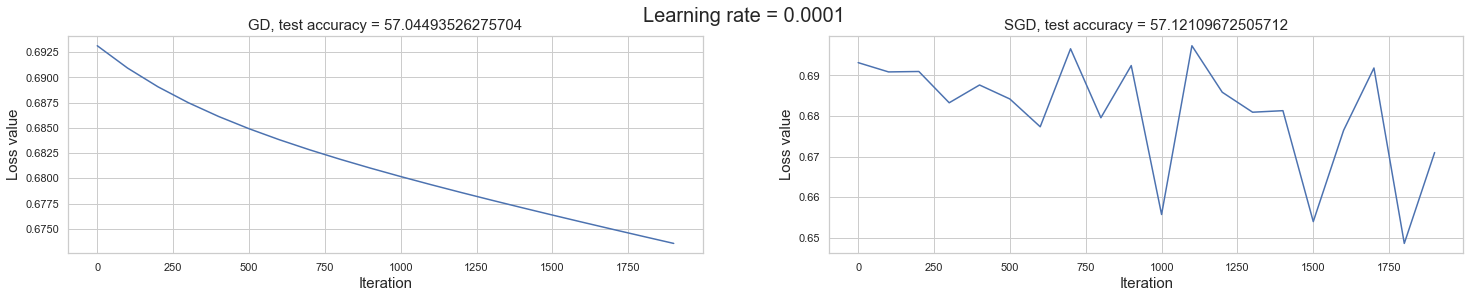

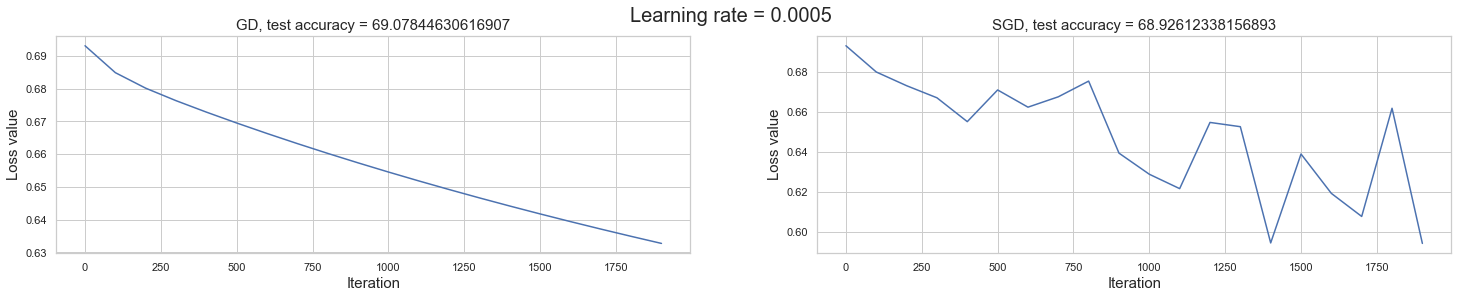

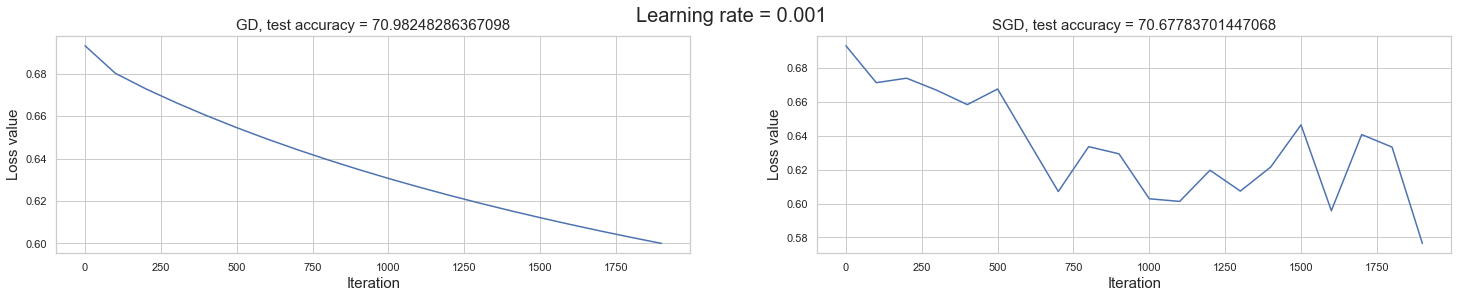

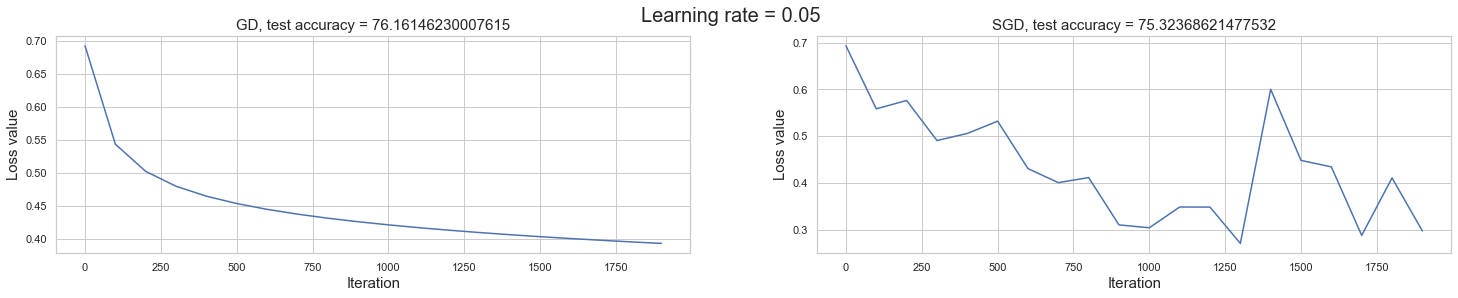

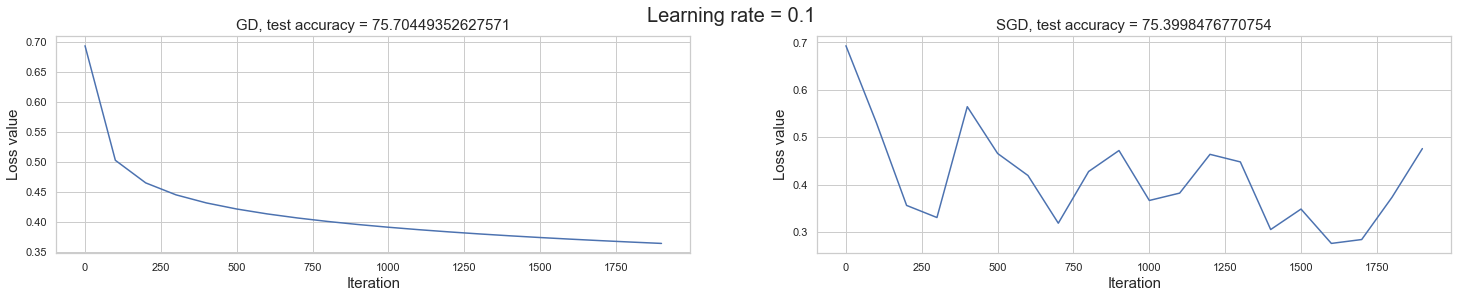

In [182]:
lrs = [0.0001, 0.0005, 0.001, 0.05, 0.1]
range_ = range(0,2000,100)
for lr in lrs:
    figure, ax = plt.subplots(1, 2, figsize=(25, 4))
    figure.suptitle("Learning rate = {}".format(lr), fontsize=20)
    sns.set_theme(style='whitegrid')
    axs = ax.ravel()
    output_sgd = model_sgd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr)
    output_gd = model_gd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr)
    axs[0].plot(range_, output_gd['costs'])
    axs[0].set_title('GD, test accuracy = {}'.format(output_gd['test accuracy']), fontsize=15)
    axs[0].set_xlabel("Iteration",fontsize = 15)
    axs[0].set_ylabel("Loss value",fontsize = 15)
    axs[1].plot(range_, output_sgd['costs'])
    axs[1].set_title('SGD, test accuracy = {}'.format(output_sgd['test accuracy']), fontsize=15)
    axs[1].set_xlabel("Iteration",fontsize = 15)
    axs[1].set_ylabel("Loss value",fontsize = 15)
    

with GD and learning rate =0.0001
train accuracy: 55.86546349466776 %
test accuracy: 57.04493526275704 %
with SGD and learning rate =0.0001
train accuracy: 55.947497949138636 %
test accuracy: 56.968773800456965 %
with GD and learning rate =0.0005
train accuracy: 69.27809680065627 %
test accuracy: 69.07844630616907 %
with SGD and learning rate =0.0005
train accuracy: 69.52420016406892 %
test accuracy: 69.53541507996954 %
with GD and learning rate =0.001
train accuracy: 73.0926989335521 %
test accuracy: 70.98248286367098 %
with SGD and learning rate =0.001
train accuracy: 73.17473338802297 %
test accuracy: 70.6016755521706 %
with GD and learning rate =0.05
train accuracy: 83.01886792452831 %
test accuracy: 76.16146230007615 %
with SGD and learning rate =0.05
train accuracy: 82.03445447087776 %
test accuracy: 76.23762376237624 %
with GD and learning rate =0.1
train accuracy: 84.94667760459393 %
test accuracy: 75.70449352627571 %
with SGD and learning rate =0.1
train accuracy: 83.675143560

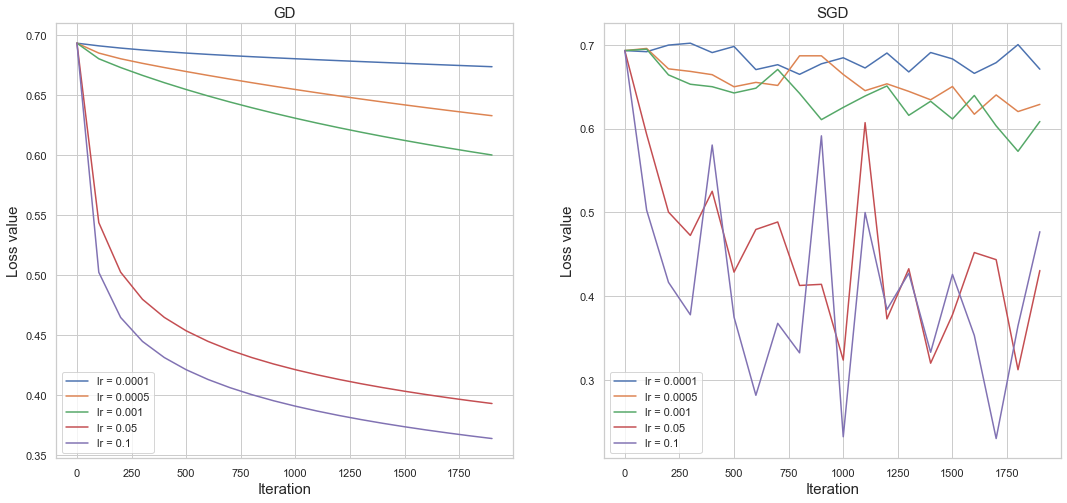

In [183]:
lrs = [0.0001, 0.0005, 0.001, 0.05, 0.1]
figure, ax = plt.subplots(1,2, figsize=(18,8))
sns.set_theme(style='whitegrid')
axs = ax.ravel()
range_ = range(0,2000,100)
for lr in lrs:
    print('with GD and learning rate ={}'.format(lr))
    output_gd = model_gd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr)
    print('with SGD and learning rate ={}'.format(lr))
    output_sgd = model_sgd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr)
    axs[0].plot(range_, output_gd['costs'])
    axs[0].set_title('GD', fontsize=15)
    axs[0].set_xlabel("Iteration",fontsize = 15)
    axs[0].set_ylabel("Loss value",fontsize = 15)
    axs[1].plot(range_, output_sgd['costs'])
    axs[1].set_title('SGD', fontsize=15)
    axs[1].set_xlabel("Iteration",fontsize = 15)
    axs[1].set_ylabel("Loss value",fontsize = 15)
axs[1].legend(list(map(lambda x: "lr = "+ str(x), lrs)))
axs[0].legend(list(map(lambda x: "lr = "+ str(x), lrs)))


We can see that the accuracy depends on learning rate 

# Logistic Regression as a Neural Network  with Adam

In [139]:
# Adam

def optimize_adam(w, b, X, Y, num_iterations, epsilon = 10**(-8), beta1 = 0.9, beta2 = 0.999, learning_rate = 0.01, print_cost = False):
   
    costs = []

    Mt1, Mt2 = initialize_with_zeros(X.shape[0])
    Vt1, Vt2 = initialize_with_zeros(X.shape[0])
    for i in range(1, num_iterations + 1):  
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        if isnan(cost):
            break

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        
        Mt1 = beta1 * Mt1 + (1 - beta1) * dw
        Mt2 = beta1 * Mt2 + (1 - beta1) * db
        Vt1 = beta2 * Vt1 + (1 - beta2) * (dw ** 2)        
        Vt2 = beta2 * Vt2 + (1 - beta2) * (db ** 2)

        Mt1n = Mt1/(1 - beta1 ** i)
        Mt2n = Mt2/(1 - beta1 ** i)
        Vt1n = Vt1/(1 - beta2 ** i)
        Vt2n = Vt2/(1 - beta2 ** i)
    
        w -=  learning_rate*(Mt1n/(np.sqrt(Vt1n) + epsilon))
        b -=  learning_rate*(Mt2n/(np.sqrt(Vt2n)+ epsilon))
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [170]:

def model_adam(X_train, Y_train, X_test, Y_test, epsilon, beta1, beta2, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Adam
    parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, epsilon, beta1, beta2, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train accuracy" : 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100,
         'test accuracy': 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100}
    
    return d

with GD and learning rate =0.0001
train accuracy: 55.86546349466776 %
test accuracy: 57.04493526275704 %
with SGD and learning rate =0.0001
train accuracy: 57.793273174733386 %
test accuracy: 58.415841584158414 %
with Adam and learning rate =0.0001
train accuracy: 77.07136997538967 %
test accuracy: 71.2871287128713 %
with GD and learning rate =0.0005
train accuracy: 69.27809680065627 %
test accuracy: 69.07844630616907 %
with SGD and learning rate =0.0005
train accuracy: 69.81132075471697 %
test accuracy: 69.84006092916984 %
with Adam and learning rate =0.0005
train accuracy: 82.48564397046759 %
test accuracy: 75.17136329017518 %
with GD and learning rate =0.001
train accuracy: 73.0926989335521 %
test accuracy: 70.98248286367098 %
with SGD and learning rate =0.001
train accuracy: 73.33880229696473 %
test accuracy: 70.22086824067023 %
with Adam and learning rate =0.001
train accuracy: 84.7005742411813 %
test accuracy: 75.55217060167556 %
with GD and learning rate =0.01
train accuracy: 79

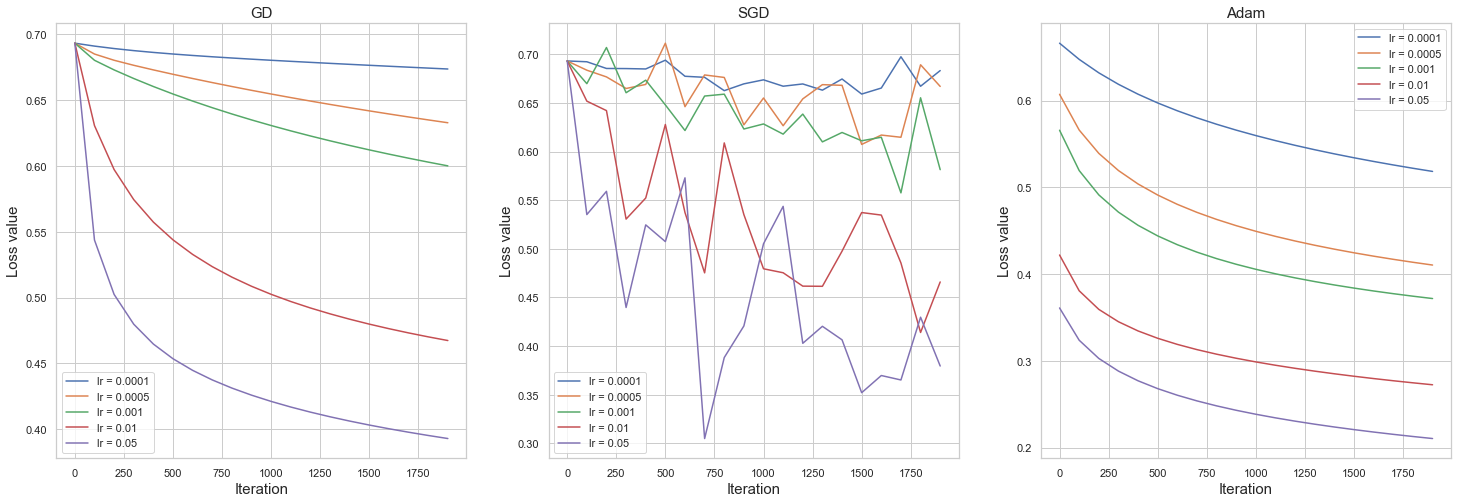

In [201]:
lrs = [0.0001, 0.0005, 0.001, 0.01, 0.05]
figure, ax = plt.subplots(1,3, figsize=(25,8))
sns.set_theme(style='whitegrid')
axs = ax.ravel()
range_ = range(0,2000,100)
test_accuracy_models = []
for lr in lrs:
    print('with GD and learning rate ={}'.format(lr))
    output_gd = model_gd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr)
    print('with SGD and learning rate ={}'.format(lr))
    output_sgd = model_sgd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr)
    print('with Adam and learning rate ={}'.format(lr))
    output_adam = model_adam(x_train, y_train, x_test, y_test, epsilon, beta1, beta2,  num_iterations = 2000, learning_rate = lr)
    test_accuracy_models.append([output_gd['test accuracy'],output_sgd['test accuracy'],output_adam['test accuracy'] ])
    axs[0].plot(range_, output_gd['costs'])
    axs[0].set_title('GD', fontsize=15)
    axs[0].set_xlabel("Iteration",fontsize = 15)
    axs[0].set_ylabel("Loss value",fontsize = 15)
    axs[1].plot(range_, output_sgd['costs'])
    axs[1].set_title('SGD', fontsize=15)
    axs[1].set_xlabel("Iteration",fontsize = 15)
    axs[1].set_ylabel("Loss value",fontsize = 15)
    axs[2].plot(range_, output_adam['costs'])
    axs[2].set_title('Adam', fontsize=15)
    axs[2].set_xlabel("Iteration",fontsize = 15)
    axs[2].set_ylabel("Loss value",fontsize = 15)
axs[2].legend(list(map(lambda x: "lr = "+ str(x), lrs)))
axs[1].legend(list(map(lambda x: "lr = "+ str(x), lrs)))
axs[0].legend(list(map(lambda x: "lr = "+ str(x), lrs)))

In [199]:
lr_1 = 0.001
print('with GD and learning rate = {}'.format(lr_1 ))
output_gd = model_gd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr_1 )
print('with SGD and learning rate = {}'.format(lr_1 ))
output_sgd = model_sgd(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = lr_1 )
print('with Adam and learning rate = {}'.format(lr_1))
output_adam = model_adam(x_train, y_train, x_test, y_test, epsilon, beta1, beta2,  num_iterations = 2000, learning_rate = lr_1 )

with GD and learning rate = 0.001
train accuracy: 73.0926989335521 %
test accuracy: 70.98248286367098 %
with SGD and learning rate = 0.001
train accuracy: 73.17473338802297 %
test accuracy: 70.37319116527037 %
with Adam and learning rate = 0.001
train accuracy: 84.7005742411813 %
test accuracy: 75.55217060167556 %


Text(0.5, 1.0, 'Comparison model with lr = 0.001')

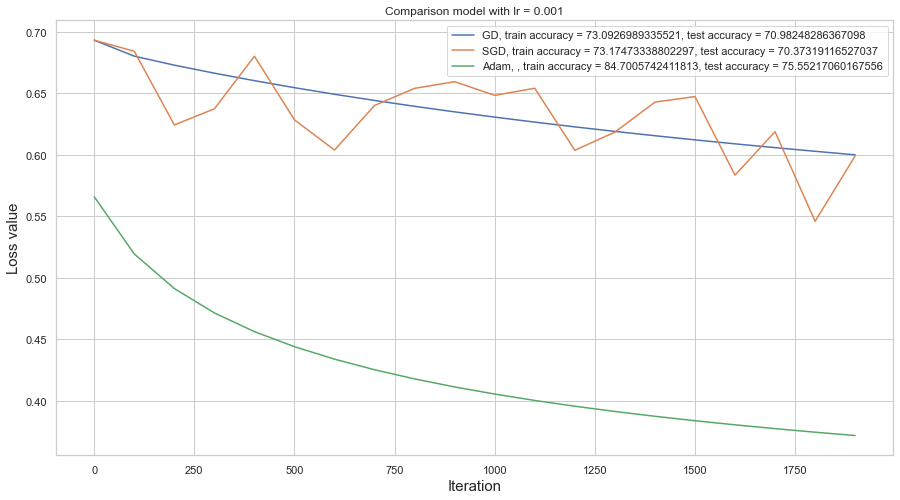

In [200]:
plt.figure(figsize=(15, 8))
plt.plot(range_, output_gd['costs'])
plt.plot(range_, output_sgd['costs'])
plt.plot(range_, output_adam['costs'])
plt.xlabel("Iteration",fontsize = 15)
plt.ylabel("Loss value",fontsize = 15)
plt.legend([
    'GD, train accuracy = {}, test accuracy = {}'.format(output_gd['train accuracy'], output_gd['test accuracy']),
    'SGD, train accuracy = {}, test accuracy = {}'.format(output_sgd['train accuracy'], output_sgd['test accuracy']),
    'Adam, , train accuracy = {}, test accuracy = {}'.format(output_adam['train accuracy'], output_adam['test accuracy'])])
plt.title('Comparison model with lr = {}'.format(lr_1))

In [205]:
pd.DataFrame(test_accuracy_models, columns = {'GD', 'SGD','Adam'}, index = lrs)

,SGD,Adam,GD
0.0001,57.044935,58.415842,71.287129
0.0005,69.078446,69.840061,75.171363
0.0010,70.982483,70.220868,75.552171
0.0100,74.942879,74.638233,74.638233
0.0500,76.161462,76.161462,74.333587


The selected learning rate for the best accuracy depends on the chosen optimization method. 

We can see that the models achieve almost the same accuracy at learning rate = 0.01